### Í∞Å ÎÇ†ÏßúÏùò 1ÏãúÍ∞Ñ Ï†ÑÏùò Í∏∞ÏÉÅÏÉÅÌô©ÏùÑ ÌôúÏö© ÌïòÏó¨ Îî∞Î¶âÏù¥ ÎåÄÏó¨ÏàòÎ•º ÏòàÏ∏°Ìï¥Î≥¥Í∏∞

In [162]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
train = pd.read_csv('../data/train.csv') # Î™®Îç∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
test = pd.read_csv('../data/test.csv')   # Î™®Îç∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞
submission = pd.read_csv('../data/submission.csv')   # Ï†úÏ∂úÏßÄ

display(train.head())
display(test.head())

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   3    20                  16.3                     1.0                 1.5   
1   6    13                  20.1                     0.0                 1.4   
2   7     6                  13.9                     0.0                 0.7   
3   8    23                   8.1                     0.0                 2.7   
4   9    18                  29.5                     0.0                 4.8   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               89.0                576.0           0.027           76.0   
1               48.0                916.0           0.042           73.0   
2               79.0               1382.0           0.033           32.0   
3               54.0                946.0           0.040           75.0   
4                7.0               2000.0           0.057           27.0   

   hour_bef_pm2.5  count  
0            33.0   49.0  
1            40.0  159.0  
2            19.0   26.0  
3            64.0   57.0  
4            11.0  431.0

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   0     7                  20.7                     0.0                 1.3   
1   1    17                  30.0                     0.0                 5.4   
2   2    13                  19.0                     1.0                 2.1   
3   4     6                  22.5                     0.0                 2.5   
4   5    22                  14.6                     1.0                 3.4   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               62.0                954.0           0.041           44.0   
1               33.0               1590.0           0.061           49.0   
2               95.0                193.0           0.020           36.0   
3               60.0               1185.0           0.027           52.0   
4               93.0                218.0           0.041           18.0   

   hour_bef_pm2.5  
0            27.0  
1            36.0  
2            28.0  
3            38.0  
4            15.0

#### ÏÑúÏö∏Ïãú ÎßàÌè¨Íµ¨Ïùò ÎÇ†ÏßúÎ≥Ñ, ÏãúÍ∞ÑÎ≥Ñ Í∏∞ÏÉÅÏÉÅÌô©Í≥º Îî∞Î¶âÏù¥ ÎåÄÏó¨ Ïàò Îç∞Ïù¥ÌÑ∞
column
* id Í≥†Ïú† id
* hour ÏãúÍ∞Ñ
* temperature Í∏∞Ïò®
* precipitation ÎπÑÍ∞Ä Ïò§ÏßÄ ÏïäÏïòÏúºÎ©¥ 0, ÎπÑÍ∞Ä Ïò§Î©¥ 1
* windspeed ÌíçÏÜç(ÌèâÍ∑†)
* humidity ÏäµÎèÑ
* visibility ÏãúÏ†ï(Ë¶ñÁ®ã), ÏãúÍ≥Ñ(Ë¶ñÁïå)(ÌäπÏ†ï Í∏∞ÏÉÅ ÏÉÅÌÉúÏóê Îî∞Î•∏ Í∞ÄÏãúÏÑ±ÏùÑ ÏùòÎØ∏)
* ozone Ïò§Ï°¥
* pm10 ÎØ∏ÏÑ∏Î®ºÏßÄ(Î®∏Î¶¨Ïπ¥ÎùΩ ÍµµÍ∏∞Ïùò 1/5ÏóêÏÑú 1/7 ÌÅ¨Í∏∞Ïùò ÎØ∏ÏÑ∏Î®ºÏßÄ)
* pm2.5 ÎØ∏ÏÑ∏Î®ºÏßÄ(Î®∏Î¶¨Ïπ¥ÎùΩ ÍµµÍ∏∞Ïùò 1/20ÏóêÏÑú 1/30 ÌÅ¨Í∏∞Ïùò ÎØ∏ÏÑ∏Î®ºÏßÄ)
* count ÏãúÍ∞ÑÏóê Îî∞Î•∏ Îî∞Î¶âÏù¥ ÎåÄÏó¨ Ïàò


In [55]:
print(train.shape)
print(test.shape)

# train Ï†ïÎ≥¥ ÌôïÏù∏
train.info()
print("=" * 60)
# test Ï†ïÎ≥¥ ÌôïÏù∏
test.info()

(1459, 11)
(715, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column               

* Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ
    * count : Ìï¥Îãπ columnÏóêÏÑú ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏùÄ Í∞íÏùò Í∞úÏàò
    * mean : ÌèâÍ∑†
    * std : ÌëúÏ§ÄÌé∏Ï∞®
    * min : ÏµúÏÜüÍ∞í(Ïù¥ÏÉÅÏπò Ìè¨Ìï®)
    * max : ÏµúÎåìÍ∞í(Ïù¥ÏÉÅÏπò Ìè¨Ìï®)

In [56]:
# train ÏÖãÏùò ÏöîÏïΩ Ï†ïÎ≥¥ ÌôïÏù∏
display(train.describe())

print("=" * 60)

# test ÏÖãÏùò ÏöîÏïΩ Ï†ïÎ≥¥ ÌôïÏù∏
display(test.describe())

id         hour  hour_bef_temperature  hour_bef_precipitation  \
count  1459.000000  1459.000000           1457.000000             1457.000000   
mean   1105.914325    11.493489             16.717433                0.031572   
std     631.338681     6.922790              5.239150                0.174917   
min       3.000000     0.000000              3.100000                0.000000   
25%     555.500000     5.500000             12.800000                0.000000   
50%    1115.000000    11.000000             16.600000                0.000000   
75%    1651.000000    17.500000             20.100000                0.000000   
max    2179.000000    23.000000             30.000000                1.000000   

       hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
count         1450.000000        1457.000000          1457.000000   
mean             2.479034          52.231297          1405.216884   
std              1.378265          20.370387           583.131708   
min              0.000000           7.000000            78.000000   
25%              1.400000          36.000000           879.000000   
50%              2.300000          51.000000          1577.000000   
75%              3.400000          69.000000          1994.000000   
max              8.000000          99.000000          2000.000000   

       hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5        count  
count     1383.000000    1369.000000     1342.000000  1459.000000  
mean         0.039149      57.168736       30.327124   108.563400  
std          0.019509      31.771019       14.713252    82.631733  
min          0.003000       9.000000        8.000000     1.000000  
25%          0.025500      36.000000       20.000000    37.000000  
50%          0.039000      51.000000       26.000000    96.000000  
75%          0.052000      69.000000       37.000000   150.000000  
max          0.125000     269.000000       90.000000   431.000000

id        hour  hour_bef_temperature  hour_bef_precipitation  \
count   715.000000  715.000000            714.000000              714.000000   
mean   1056.854545   11.472727             23.263305                0.051821   
std     625.574471    6.928427              4.039645                0.221820   
min       0.000000    0.000000             14.600000                0.000000   
25%     507.000000    5.500000             20.300000                0.000000   
50%    1046.000000   11.000000             22.900000                0.000000   
75%    1616.500000   17.000000             26.375000                0.000000   
max    2177.000000   23.000000             33.800000                1.000000   

       hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
count          714.000000         714.000000           714.000000   
mean             2.388515          56.668067          1359.494398   
std              1.171270          19.661880           614.171870   
min              0.000000          16.000000           126.000000   
25%              1.500000          42.000000           807.250000   
50%              2.300000          55.000000          1489.000000   
75%              3.275000          73.750000          2000.000000   
max              5.900000         100.000000          2000.000000   

       hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  
count      680.000000     678.000000      679.000000  
mean         0.041196      36.930678       24.939617  
std          0.020656      12.641503       10.075857  
min          0.003000       9.000000        7.000000  
25%          0.027000      28.000000       17.000000  
50%          0.039000      35.000000       24.000000  
75%          0.052250      45.000000       31.000000  
max          0.138000      94.000000       69.000000

In [57]:
# ÏãúÍ∞ÑÎ≥ÑÎ°ú groupÏãúÏºúÏÑú ÌôïÏù∏
train.groupby('hour').mean()

id  hour_bef_temperature  hour_bef_precipitation  \
hour                                                              
0     1200.016667             14.788136                0.016949   
1     1074.918033             14.155738                0.049180   
2     1077.885246             13.747541                0.049180   
3     1146.704918             13.357377                0.032787   
4     1194.786885             13.001639                0.016393   
5     1091.819672             12.673770                0.016393   
6     1112.393443             12.377049                0.016393   
7     1086.262295             12.191803                0.016393   
8     1086.491803             12.600000                0.032787   
9     1076.524590             14.318033                0.016393   
10     965.704918             16.242623                0.016393   
11    1208.803279             18.019672                0.000000   
12    1149.639344             19.457377                0.016393   
13     988.616667             20.648333                0.016667   
14    1067.327869             21.234426                0.065574   
15    1181.918033             21.744262                0.065574   
16    1029.100000             22.015000                0.050000   
17    1178.950000             21.603333                0.100000   
18    1127.327869             20.926667                0.016667   
19    1153.147541             19.704918                0.032787   
20    1000.934426             18.191803                0.049180   
21    1109.116667             16.978333                0.016667   
22    1153.327869             16.063934                0.032787   
23    1079.836066             15.418033                0.016393   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
hour                                                               
0               1.965517          58.169492          1434.220339   
1               1.836667          60.459016          1400.852459   
2               1.633333          61.721311          1374.278689   
3               1.620000          63.131148          1326.311475   
4               1.409836          64.573770          1264.606557   
5               1.296721          66.000000          1203.426230   
6               1.331148          67.409836          1146.229508   
7               1.262295          67.934426          1150.311475   
8               1.632787          64.049180          1152.868852   
9               1.829508          57.803279          1189.098361   
10              2.122951          51.622951          1291.295082   
11              2.485246          46.262295          1358.868852   
12              2.766667          42.147541          1469.606557   
13              3.281356          38.850000          1512.266667   
14              3.522951          37.573770          1519.721311   
15              3.768852          37.393443          1528.065574   
16              3.820000          36.450000          1566.583333   
17              3.801667          38.883333          1561.733333   
18              3.838333          40.450000          1581.850000   
19              3.595082          43.573770          1576.688525   
20              3.278333          47.573770          1565.557377   
21              2.755000          50.450000          1590.016667   
22              2.498361          53.950820          1512.081967   
23              2.195082          56.393443          1462.508197   

      hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5       count  
hour                                                             
0           0.033763      55.881356       30.982759   71.766667  
1                NaN            NaN             NaN   47.606557  
2           0.030492      58.475410       31.366667   31.409836  
3           0.031213      59.180328       31.466667   21.377049  
4           0.031984      58.278689       32.116667   13.524590  
5           0.031623      56.721311      

"\n'count'ÏôÄ ÏùòÎØ∏ÏûàÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Îäî Ïï†Îì§\n\nhour ÏãúÍ∞Ñ\ntemperature Í∏∞Ïò®\nwindspeed ÌíçÏÜç(ÌèâÍ∑†)\nhumidity ÏäµÎèÑ\nvisibility ÏãúÏ†ï(Ë¶ñÁ®ã), ÏãúÍ≥Ñ(Ë¶ñÁïå)(ÌäπÏ†ï Í∏∞ÏÉÅ ÏÉÅÌÉúÏóê Îî∞Î•∏ Í∞ÄÏãúÏÑ±ÏùÑ ÏùòÎØ∏)\nozone Ïò§Ï°¥\ncount ÏãúÍ∞ÑÏóê Îî∞Î•∏ Îî∞Î¶âÏù¥ ÎåÄÏó¨ Ïàò\n"

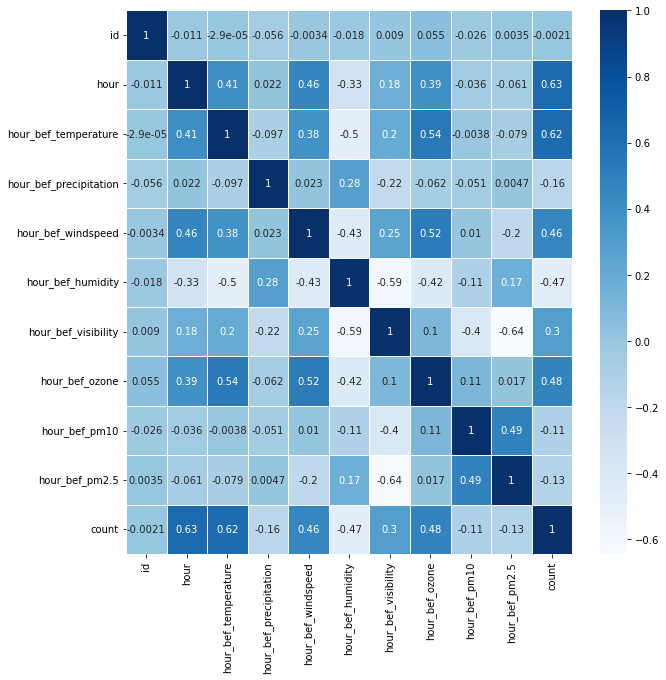

In [58]:
# heatmapÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏Ìï¥Î≥¥Í∏∞

plt.figure(figsize=(10,10))
sns.heatmap(data = train.corr(), annot=True, linewidths=.5, cmap='Blues')
'''
'count'ÏôÄ ÏùòÎØ∏ÏûàÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Îäî Ïï†Îì§

hour ÏãúÍ∞Ñ
temperature Í∏∞Ïò®
windspeed ÌíçÏÜç(ÌèâÍ∑†)
humidity ÏäµÎèÑ
visibility ÏãúÏ†ï(Ë¶ñÁ®ã), ÏãúÍ≥Ñ(Ë¶ñÁïå)(ÌäπÏ†ï Í∏∞ÏÉÅ ÏÉÅÌÉúÏóê Îî∞Î•∏ Í∞ÄÏãúÏÑ±ÏùÑ ÏùòÎØ∏)
ozone Ïò§Ï°¥
count ÏãúÍ∞ÑÏóê Îî∞Î•∏ Îî∞Î¶âÏù¥ ÎåÄÏó¨ Ïàò
'''

'\nÏ∂úÌá¥Í∑º ÏãúÍ∞ÑÏóê ÎåÄÏó¨ÎüâÏù¥ ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏù¥ Î≥¥ÏûÑ\n'

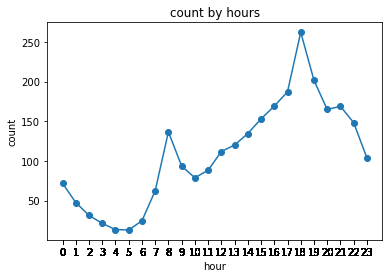

In [59]:
plt.plot(train.groupby('hour').mean()['count'],
         'o-')

plt.xticks(ticks=train['hour'])
plt.title('count by hours')
plt.xlabel('hour')
plt.ylabel('count')
'''
Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÏóê ÎåÄÏó¨ÎüâÏù¥ ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏù¥ Î≥¥ÏûÑ
'''

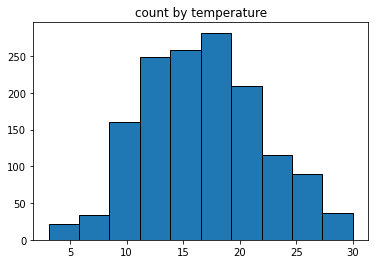

'\n10ÎèÑ ~ 20ÎèÑ ÏÇ¨Ïù¥Ïóê ÎπàÎèÑÏàòÍ∞Ä ÎÜíÏùÄ Í≤ÉÏùÑ ÌôïÏù∏\n'

In [60]:
plt.hist(train['hour_bef_temperature'],
         edgecolor='black')
plt.title('count by temperature')
plt.show()

'''
10ÎèÑ ~ 20ÎèÑ ÏÇ¨Ïù¥Ïóê ÎπàÎèÑÏàòÍ∞Ä ÎÜíÏùÄ Í≤ÉÏùÑ ÌôïÏù∏
'''

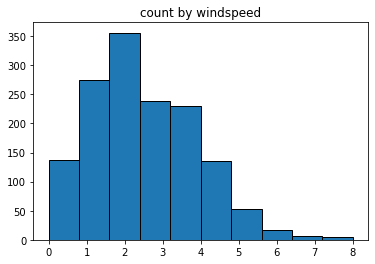

'\n5Ïù¥ÏÉÅÏùò ÌíçÏÜçÏù¥ Î∂àÎïå, ÎπàÎèÑÏàòÍ∞Ä ÎÇÆÏïÑÏßê\n'

In [61]:
plt.hist(train['hour_bef_windspeed'],
         edgecolor='black')
plt.title('count by windspeed')
plt.show()

'''
5Ïù¥ÏÉÅÏùò ÌíçÏÜçÏù¥ Î∂àÎïå, ÎπàÎèÑÏàòÍ∞Ä ÎÇÆÏïÑÏßê
'''

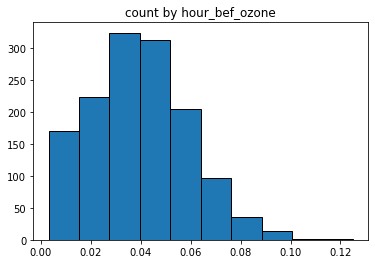

'\nÏò§Ï°¥ Ï£ºÏùòÎ≥¥ Í∏∞Ï§ÄÏù¥ 0.12ppm Ïù¥ÏÉÅÏûÑ\n0.07Î∂ÄÌÑ∞ ÎπàÎèÑÏàòÍ∞Ä Ï§ÑÏñ¥ÎìúÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå\n'

In [62]:
plt.hist(train['hour_bef_ozone'],
         edgecolor='black')
plt.title('count by hour_bef_ozone')
plt.show()

'''
Ïò§Ï°¥ Ï£ºÏùòÎ≥¥ Í∏∞Ï§ÄÏù¥ 0.12ppm Ïù¥ÏÉÅÏûÑ
0.07Î∂ÄÌÑ∞ ÎπàÎèÑÏàòÍ∞Ä Ï§ÑÏñ¥ÎìúÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå
'''

#### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [63]:
# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî Ïª¨Îüº ÎìúÎûç
'''
hour ÏãúÍ∞Ñ
temperature Í∏∞Ïò®
windspeed ÌíçÏÜç(ÌèâÍ∑†)
humidity ÏäµÎèÑ
visibility ÏãúÏ†ï(Ë¶ñÁ®ã), ÏãúÍ≥Ñ(Ë¶ñÁïå)(ÌäπÏ†ï Í∏∞ÏÉÅ ÏÉÅÌÉúÏóê Îî∞Î•∏ Í∞ÄÏãúÏÑ±ÏùÑ ÏùòÎØ∏)
ozone Ïò§Ï°¥
count ÏãúÍ∞ÑÏóê Îî∞Î•∏ Îî∞Î¶âÏù¥ ÎåÄÏó¨ Ïàò
'''
train.drop(['hour_bef_pm10','hour_bef_pm2.5'], axis=1, inplace=True)
display(train.head())

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   3    20                  16.3                     1.0                 1.5   
1   6    13                  20.1                     0.0                 1.4   
2   7     6                  13.9                     0.0                 0.7   
3   8    23                   8.1                     0.0                 2.7   
4   9    18                  29.5                     0.0                 4.8   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  count  
0               89.0                576.0           0.027   49.0  
1               48.0                916.0           0.042  159.0  
2               79.0               1382.0           0.033   26.0  
3               54.0                946.0           0.040   57.0  
4                7.0               2000.0           0.057  431.0

In [64]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(train.isna().sum())
print(train.isna().sum().sum())

# Í≤∞Ï∏°Ïπò ÎπÑÏú®
#train.isnull().sum() / len(train)*100

id                         0
hour                       0
hour_bef_temperature       2
hour_bef_precipitation     2
hour_bef_windspeed         9
hour_bef_humidity          2
hour_bef_visibility        2
hour_bef_ozone            76
count                      0
dtype: int64
93


In [65]:
#train.groupby('hour').mean()
ozone_1hour = (0.033763 + 0.030492)/2
print(ozone_1hour)

0.0321275


In [66]:
# ÏãúÍ∞ÑÎ≥Ñ ÌèâÍ∑†ÏúºÎ°ú Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥
fill_mean_hour = lambda x: x.fillna(x.mean())
train = train.groupby('hour').apply(fill_mean_hour)

In [67]:
# hour_bef_ozone 1ÏãúÎäî 0ÏãúÏôÄ 2ÏãúÏùò ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥
train['hour_bef_ozone'] = train['hour_bef_ozone'].fillna(0.0321275)

In [68]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
count                     0
dtype: int64

In [69]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [70]:
test.drop(['hour_bef_pm10','hour_bef_pm2.5'], axis=1, inplace=True)
display(test.head())

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   0     7                  20.7                     0.0                 1.3   
1   1    17                  30.0                     0.0                 5.4   
2   2    13                  19.0                     1.0                 2.1   
3   4     6                  22.5                     0.0                 2.5   
4   5    22                  14.6                     1.0                 3.4   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  
0               62.0                954.0           0.041  
1               33.0               1590.0           0.061  
2               95.0                193.0           0.020  
3               60.0               1185.0           0.027  
4               93.0                218.0           0.041

In [27]:
#test[test['hour_bef_ozone'].isnull()]

In [71]:
# train setÏùò ÌèâÍ∑†ÏπòÎ°ú Ï±ÑÏõåÏ§å
test['hour_bef_ozone'] = test['hour_bef_ozone'].fillna(0.0321275)
display(test.head())

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   0     7                  20.7                     0.0                 1.3   
1   1    17                  30.0                     0.0                 5.4   
2   2    13                  19.0                     1.0                 2.1   
3   4     6                  22.5                     0.0                 2.5   
4   5    22                  14.6                     1.0                 3.4   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  
0               62.0                954.0           0.041  
1               33.0               1590.0           0.061  
2               95.0                193.0           0.020  
3               60.0               1185.0           0.027  
4               93.0                218.0           0.041

In [73]:
fill_mean_hour = lambda x: x.fillna(x.mean())
test = test.groupby('hour').apply(fill_mean_hour)
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
dtype: int64

#### Ï†ïÍ∑úÌôî

In [74]:
# Min-max Scaling

# train
def min_max(s):
    return (s - s.min()) / (s.max() - s.min())

train_MinMax = train.apply(min_max, axis=0)

display(train_MinMax.head())

print("=" * 100)

# test
test_MinMax = test.apply(min_max, axis=0)

display(test_MinMax.head())

id      hour  hour_bef_temperature  hour_bef_precipitation  \
0  0.000000  0.869565              0.490706                     1.0   
1  0.001379  0.565217              0.631970                     0.0   
2  0.001838  0.260870              0.401487                     0.0   
3  0.002298  1.000000              0.185874                     0.0   
4  0.002757  0.782609              0.981413                     0.0   

   hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  \
0              0.1875           0.891304             0.259105        0.196721   
1              0.1750           0.445652             0.436004        0.319672   
2              0.0875           0.782609             0.678460        0.245902   
3              0.3375           0.510870             0.451613        0.303279   
4              0.6000           0.000000             1.000000        0.442623   

      count  
0  0.111628  
1  0.367442  
2  0.058140  
3  0.130233  
4  1.000000

id      hour  hour_bef_temperature  hour_bef_precipitation  \
0  0.000000  0.304348              0.317708                     0.0   
1  0.000459  0.739130              0.802083                     0.0   
2  0.000919  0.565217              0.229167                     1.0   
3  0.001837  0.260870              0.411458                     0.0   
4  0.002297  0.956522              0.000000                     1.0   

   hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  
0            0.220339           0.547619             0.441836        0.281481  
1            0.915254           0.202381             0.781217        0.429630  
2            0.355932           0.940476             0.035752        0.125926  
3            0.423729           0.523810             0.565101        0.177778  
4            0.576271           0.916667             0.049093        0.281481

#### ÌëúÏ§ÄÌôî

In [116]:
# Standard Sacler // train
feature_names = ['id','hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility',
                 'hour_bef_ozone','count']

train_standadized_skl = StandardScaler().fit_transform(train)

train_standadized = pd.DataFrame(data=train_standadized_skl, columns=feature_names)

In [118]:
# Standard Sacler // test
feature_names = ['id','hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility',
                 'hour_bef_ozone']

test_standadized_skl = StandardScaler().fit_transform(test)

test_standadized = pd.DataFrame(data=test_standadized_skl, columns=feature_names)

In [117]:
display(train_standadized)

id      hour  hour_bef_temperature  hour_bef_precipitation  \
0    -1.747545  1.229190             -0.080035                5.542292   
1    -1.742791  0.217691              0.645826               -0.180565   
2    -1.741207 -0.793809             -0.538473               -0.180565   
3    -1.739622  1.662690             -1.646366               -0.180565   
4    -1.738038  0.940191              2.441376               -0.180565   
...        ...       ...                   ...                     ...   
1454  1.692359 -1.082809              0.015473               -0.180565   
1455  1.693944 -1.227309             -1.130623               -0.180565   
1456  1.695528 -0.938309              0.301997               -0.180565   
1457  1.698697  1.373690              0.760435               -0.180565   
1458  1.700282  0.795691              0.836842               -0.180565   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
0              -0.711998           1.806803            -1.423666   
1              -0.784729          -0.207705            -0.840026   
2              -1.293845           1.315459            -0.040096   
3               0.160773           0.087101            -0.788528   
4               1.688121          -2.222213             1.020756   
...                  ...                ...                  ...   
1454           -0.639267           0.037966             1.020756   
1455            0.960812          -0.355108             1.020756   
1456           -0.421074           0.087101             1.020756   
1457            0.888081          -0.748183            -0.017780   
1458            0.451696          -0.256840             0.974408   

      hour_bef_ozone     count  
0          -0.624442 -0.721077  
1           0.160388  0.610587  
2          -0.310510 -0.999516  
3           0.055744 -0.624228  
4           0.945218  3.903430  
...              ...       ...  
1454       -0.415154 -1.060046  
1455        0.003422 -1.072152  
1456       -1.566238 -1.047940  
1457        2.253267  1.300632  
1458        0.369676  0.743754  

[1459 rows x 9 columns]

In [91]:
train.corr()['count']

id                       -0.002131
hour                      0.626047
hour_bef_temperature      0.618222
hour_bef_precipitation   -0.163724
hour_bef_windspeed        0.459692
hour_bef_humidity        -0.470337
hour_bef_visibility       0.298538
hour_bef_ozone            0.481104
count                     1.000000
Name: count, dtype: float64

### Î≥ÄÏàò ÏÑ†ÌÉù Î∞è Î™®Îç∏ Íµ¨Ï∂ï

In [129]:
# X(features)Î•º modelÏóê ÏûÖÎ†• Î∞õÏïòÏùÑÎïå, Y(count)Î•º ÏÇ∞Ï∂úÌïòÎäî Í≤É

features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone']

# model ÌïôÏäµÌï†Îïå ÏÇ¨Ïö©ÎêòÎäî ÎÜà!
X_train = train_standadized[features] 
y_train = train_standadized['count']

# model ÌÖåÏä§Ìä∏Ìï†Îïå ÏÇ¨Ïö©ÎêòÎäî ÎÜà!
X_test = test_standadized[features]

In [135]:
# RandomForest  => ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥Í∞Ä Î™®Ïó¨ÏÑú Ïà≤ÏúºÎ°ú!! ÎëêÎë•! üòÆ
# n_estimators => ÎÇòÎ¨¥ Í∞úÏàò
# max_depth => Î™®Îç∏Ïùò Í≥ºÎåÄÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Ï£ºÎäî Í∞í // ??ü§î

model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model100_10 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

In [136]:
# ÌïôÏäµÏãúÏºúÎ≤ÑÎ¶¨Í∏∞
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model100_10.fit(X_train, y_train)
model200.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [137]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred10 = model100_10.predict(X_test)
ypred3 = model200.predict(X_test)

In [138]:
print(submission.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(715, 2)
(1459, 6)
(1459,)
(715, 6)


In [134]:
submission['count']=ypred1
submission.to_csv('model100_3.csv', index = False)
#display(submission)

In [127]:
submission['count']=ypred2
#submission.to_csv('model100_5_2.csv', index = False)

In [125]:
submission['count']=ypred3
#submission.to_csv('model200_2.csv', index = False)

In [140]:
submission['count']=ypred10
submission.to_csv('model100_10.csv', index = False)

1. 1ÏãúÏóê Ïò§Ï°¥Í∞íÏùÄ Ïôú Îã§ ÎπÑÏñ¥ÏûàÏßÄ?? => Í∑∏ÎûòÏÑú 0Ïãú 2ÏãúÏùò ÌèâÍ∑†Í∞íÏúºÎ°ú Ï±ÑÏõ†Ïùå => Ïù¥Îü¥Í≤å ÏïÑÎãàÎùº Í∑∏ÎÉ• ozone Ïª¨ÎüºÏùÑ ÏóÜÏï®Í±∏ Í∑∏Îû¨Ïñ¥
2. Ï†êÏàòÍ∞Ä ÎÑàÎ¨¥ ÎÇÆÏùå...  n_estimators=100 Ïù¥ Ï†úÏùº ÎÇÆÏùÄÎç∞,, Ï†úÏùº ÎÇÆÏùÄ Ï†êÏàòÍ∞Ä 164.6285160982 „Öé...  
=> train ÏÖãÏùò Í≤∞Ï∏°ÏπòÎäî ÏãúÍ∞ÑÎ≥Ñ ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõåÏ£ºÍ≥†, test ÏÖãÏùÄ Ïª¨ÎüºÎ≥Ñ ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõ†Ïùå  
  Ïò§Ï°¥ÎüâÏù¥ Î¨∏Ï†úÏòÄÎÇò..?  
3. ÌëúÏ§ÄÌôî / Ï†ïÍ∑úÌôî ÏïÑÏßÅ Ïûò Î™®Î£®Í≤†ÏäµÎØ∏Îã§ üò•  
4.ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Í∑∏ÎûòÌîÑ Í∑∏Î†§Î≥¥Í≥†Ïã∂ÏóàÎäîÎç∞ üò•